In [21]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from wordcloud import WordCloud
import re
import json
import string

In [2]:
# Create Sastrawi stemmer
stemmer = StemmerFactory().create_stemmer()

In [3]:
# Create Stopword
my_stop_words = StopWordRemoverFactory().get_stop_words()
f = open("Stopword.txt", "r")
stop = f.readlines()
f.close()
my_stop_words += stop
my_stop_words =  list(dict.fromkeys(my_stop_words))

In [4]:
# Preprocessor
def my_preprocessor(mytext):
    #Convert to lower case
    mytext = mytext.lower()
    #Remove additional code
    mytext = mytext.replace('\\xe2\\x80\\xa6', '')
    #Convert www.* or https?://* to URL
    mytext = re.sub('((www\.[^\s]+)|(https?://[^\s]+))','URL',mytext)
    #Convert @username to AT_USER
    mytext = re.sub('@[^\s]+','ATUSER',mytext)
    #Remove additional white spaces
    mytext = re.sub('[\s]+', ' ', mytext)
    #Replace #word with word
    mytext = re.sub(r'#([^\s]+)', r'\1',mytext)
    #Menghapus angka dari teks
    mytext = re.sub(r"\d+", "", mytext)
    #Menghapus tanda baca
    mytext = mytext.translate(str.maketrans(string.punctuation, ' '*len(string.punctuation)))
    return mytext

In [5]:
# Tokenizer
def my_tokenizer(mytext):
    words = word_tokenize(mytext)
    tokens=[]
    for w in words:
        #add tokens
        if w not in ['ATUSER','URL'] and len(w) > 3:
            w = stemmer.stem(w)
            tokens.append(w.lower())
    return tokens

In [6]:
# Cleanner 
def cleaning(text):
    text= text[2:]
    text = text.replace('\\n',' ')
    return text

In [8]:
# Import data
data_ = pd.read_csv('Data Sentiment Twitter 19 - 27 April.csv')
datap = data_['Tweets'][data_['Sentiment'] == 1].tolist()
datan = data_['Tweets'][data_['Sentiment'] == -1].tolist()

In [9]:
# Cleaning Data
for i in range(len(datap)):
    datap[i] = cleaning(datap[i])
for i in range(len(datan)):
    datan[i] = cleaning(datan[i])

In [42]:
# Defining Vectorizer Positif
vectorizer_tfidf = TfidfVectorizer(preprocessor=my_preprocessor, tokenizer=my_tokenizer, stop_words=my_stop_words, min_df=5, max_df=0.85)

In [58]:
# Modelling Positif
word_tfidfp = vectorizer_tfidf.fit_transform(datap)

In [60]:
# Saving Model Positif
import pickle
pickle.dump(vectorizer_tfidf, open("sentiment_model_p.pickle", "wb"))
pickle.dump(word_tfidfp, open("sentiment_word_tfidf_p.pickle", "wb"))

In [75]:
# Vocabulary Dictionary Positif 
positif = vectorizer_tfidf.vocabulary_
positif = {k: v for k, v in sorted(positif.items(), key=lambda item: item[1])}
positif = dict((k, v) for k, v in positif.items() if v >= 1500)

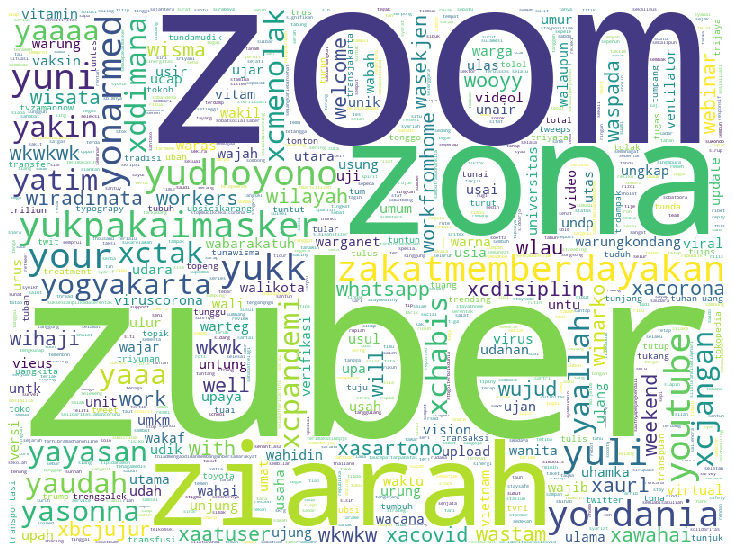

In [77]:
# WordCloud kata dengan bobot terbesar Positif
w = WordCloud(width=800,height=600,mode='RGBA',stopwords=my_stop_words,background_color='white',max_words=2000).fit_words(positif)
plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(w)
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

In [17]:
# Defining Vectorizer Negatif
vectorizer_tfidfn = TfidfVectorizer(preprocessor=my_preprocessor, tokenizer=my_tokenizer, stop_words=my_stop_words, min_df=5, max_df=0.85)

In [18]:
# Modelling Negatif
word_tfidfn = vectorizer_tfidfn.fit_transform(datan)

In [19]:
# Saving Model Negatif
import pickle
pickle.dump(vectorizer_tfidfn, open("sentiment_model_n.pickle", "wb"))
pickle.dump(word_tfidfn, open("sentiment_word_tfidf_n.pickle", "wb"))

In [52]:
# Vocabulary Dictionary Negatif 
negatif = vectorizer_tfidfn.vocabulary_
negatif = {k: v for k, v in sorted(negatif.items(), key=lambda item: item[1])}
negatif = dict((k, v) for k, v in negatif.items() if v >= 100)

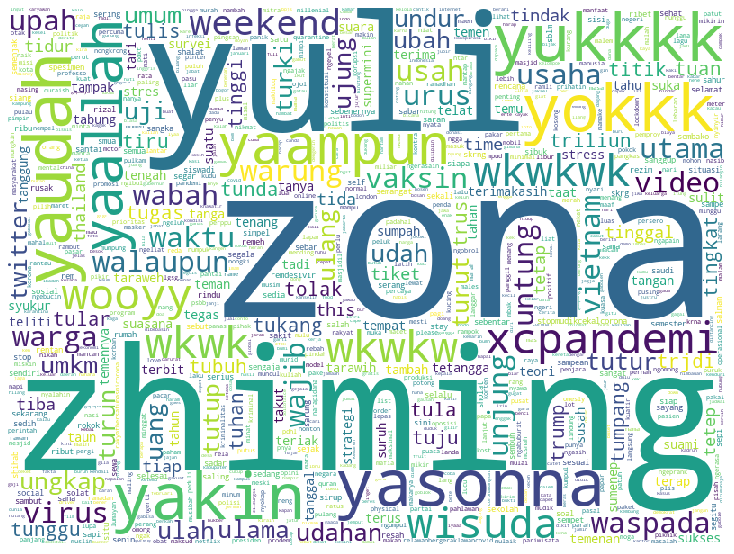

In [54]:
# WordCloud kata dengan bobot terbesar Negatif
w = WordCloud(width=800,height=600,mode='RGBA',stopwords=my_stop_words,background_color='white',max_words=2000).fit_words(negatif)
plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(w)
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()